<a href="https://colab.research.google.com/github/hughjafro/DS-Sprint-5-Project-Week/blob/master/DS_151_Sprint_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Readme:

####1. What is my hypothesis: That the team with a higher Elo should win more than 50% of the time

**Background:**
* NBA founded in 1946 as Basketball Association of America. Merged with National Basketball League and renamed NB Ain 1949.
* Four (4) ABA teams added to NBA in 1977 
* Modern era is considered 1998 to present - post-Jordan Bulls dominance.
* [Timeline of NBA Teams](https://en.wikipedia.org/wiki/Timeline_of_the_National_Basketball_Association)

####2. Add data from fivethirthyeight regarding Elo and CARM-ELO


####3. Explore Parse/Clean Data
  * Determine what data is necessary and which is auxiliary
  * Clean data - deal with empty cells
  * 

####4. Define essential data, Group data
* Group by year, first, to analyze data by year, Then expand to multiple years
  * Group by team to determine
* Group by home team (team 1) / Away team (team 2)

####5. Data Viz
* Probably Seaborn, Plotly, Bokeh
* Utilize line charts
  * with colored area under the cover
* Extend to Bokeh
  * bar_pandas_groupby_nested
  * ridgeplot
  * **range_tool!!!!**

####6. Build further models/algorithms
* Stretch Goals
    * Add hypothesis testing
    * .rolling - Rolling Average ([Stack Overflow](https://stackoverflow.com/questions/49684734/dataframe-moving-average-with-rolling-mean-and-shift-while-ignoring-nan))

####7. Feedback loop / Iterate


####Notes:
Explanation of Elo rating from [FiveThirtyEight](https://fivethirtyeight.com/features/how-we-calculate-nba-elo-ratings/)
[CARM-ELO](https://projects.fivethirtyeight.com/carmelo/) (**C**areer-**a**rc **R**egression **M**odel **E**stimator with **L**ocal **O**ptimization ) explanation

Special data that introduces specific stats. May later explain jumps/spikes in data results:

*Seperated by years the new stat was introduced and tracked*

| Pre-1971        | 1973-74           | 1977-80  |
| ------------- |:-------------:| -----:|
| Rebounds: 1950-51      | Steals: 1973-74 | Turnovers: 1977-78 |
| Minutes: 1951-52      | Blocks: 1973-74     | 3-pt: 1979-80     
| Started: 1970-71 | Off Rebounds: 1973-74     |     |
|  | Def Rebounds: 1973-74      |     |

*[Neutral site game](https://https://www.nba.com/global/games2013/all-time-international-game-list.html)* - There are a total of 30 neutral site games

*[NBA stats FAQ](https://https://stats.nba.com/help/faq/)*

*Total games from 11/1/1946 to 6/8/18* - 67094 (includes playoffs)



###1. Hypothesis

####2. Add data from fivethirthyeight regarding Elo and CARM-ELO

In [0]:
# import all modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
#import seaborn seperately just in case version control issues occur
import seaborn as sns

In [4]:
sns.__version__

'0.9.0'

In [54]:
# Data source: FiveThirthyEight
url = 'https://projects.fivethirtyeight.com/nba-model/nba_elo.csv'

# Import dataset from assigned url
nba_data = pd.read_csv(url)

#Convert date column to datetime format
nba_data['date'] = pd.to_datetime(nba_data['date']) 

# Look at the rows/columns and general statistical data
print(nba_data.shape)

nba_data.describe()

(68324, 24)


,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,carm-elo1_pre,carm-elo2_pre,carm-elo1_post,carm-elo2_post,carm-elo_prob1,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2
count,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,68324.000000,67509.000000,67509.000000,5167.000000,5167.000000,4352.000000,4352.000000,5167.000000,5167.000000,1230.000000,1230.000000,1230.000000,1230.000000,67509.000000,67509.000000
mean,1990.414291,0.000439,1496.288527,1496.531596,0.621177,0.378823,1496.139950,1496.478742,1512.581361,1510.895672,1512.443791,1512.551289,0.626500,0.373500,1515.391189,1515.190962,0.620690,0.379310,104.736568,101.052749
std,18.594788,0.020950,112.336802,111.772688,0.178154,0.178154,112.904160,112.062694,117.411214,117.005928,119.041196,118.110868,0.191998,0.191998,118.110878,117.916737,0.201302,0.201302,14.833846,14.283673
min,1947.000000,0.000000,1105.617800,1091.644500,0.062616,0.018315,1100.291900,1085.774400,1187.730784,1192.842155,1187.730784,1192.004524,0.060474,0.013407,1281.328778,1276.551561,0.120228,0.037539,2.000000,0.000000
25%,1976.000000,0.000000,1418.910550,1419.052850,0.498848,0.240520,1417.841700,1418.807900,1438.930652,1438.193630,1434.249496,1435.686432,0.494773,0.220389,1432.879498,1432.879498,0.470104,0.210584,95.000000,92.000000
50%,1992.000000,0.000000,1501.683749,1502.858400,0.639999,0.360001,1501.540900,1502.436000,1511.601379,1511.129658,1510.344856,1512.235418,0.652158,0.347842,1519.041607,1519.041607,0.646658,0.353342,105.000000,101.000000
75%,2006.000000,0.000000,1576.590325,1576.036450,0.759480,0.501152,1576.696200,1576.256600,1589.251142,1585.906281,1585.690723,1583.582698,0.779611,0.505227,1609.128145,1609.128145,0.789416,0.529896,114.000000,110.000000
max,2019.000000,1.000000,1855.779115,1865.449075,0.981685,0.937384,1860.313175,1865.449075,1872.690559,1881.619599,1876.930941,1881.619599,0.986593,0.939526,1765.838659,1767.243578,0.962461,0.879772,184.000000,186.000000


In [65]:
# May need to use averages for 2018 season
print("2018 - Home team mean score: ", nba_data[nba_data['season'] == 2018]['score1'].mean())
print("2018 - Away team mean score: ", nba_data[nba_data['season'] == 2018]['score2'].mean())
print("2018 - Home team before game Elo mean score: ", nba_data[nba_data['season'] == 2018]['elo1_pre'].mean())
print("2018 - Home team after game Elo mean score: ", nba_data[nba_data['season'] == 2018]['elo1_post'].mean())
print("2018 - Away team before game Elo mean score: ", nba_data[nba_data['season'] == 2018]['elo2_pre'].mean())
print("2018 - Away team before game Elo mean score: ", nba_data[nba_data['season'] == 2018]['elo2_post'].mean())

2018 - Home team mean score:  107.3986280487805
2018 - Away team mean score:  105.03201219512195
2018 - Home team before game Elo mean score:  1513.7851224779076
2018 - Home team after game Elo mean score:  1512.5584547900144
2018 - Away team before game Elo mean score:  1510.3973173980207
2018 - Away team before game Elo mean score:  1511.6239850859142


Why does the away team's Elo rating rise, on average, after the game? Looks like the away team in 2018 season won more than the home team?!?

In [0]:
# Set the means of the main categories to variables for future use
nba_hscore_mean = nba_data[nba_data['season'] == 2018]['score1'].mean()
nba_ascore_mean = nba_data[nba_data['season'] == 2018]['score2'].mean()
nba_elo1pre_mean = nba_data[nba_data['season'] == 2018]['elo1_pre'].mean()
nba_elo1post_mean = nba_data[nba_data['season'] == 2018]['elo1_post'].mean()
nba_elo2pre_mean = nba_data[nba_data['season'] == 2018]['elo2_pre'].mean()
nba_elo2post_mean = nba_data[nba_data['season'] == 2018]['elo2_post'].mean()

In [101]:
# Moving average of Home Team pre-game Elo rating
nba_rolling_elo1pre = nba_data.elo1_pre.rolling(window=2).mean()
nba_rolling_elo1pre

0                NaN
1        1300.000000
2        1300.000000
3        1300.000000
4        1300.000000
5        1300.000000
6        1297.654600
7        1295.077500
8        1287.232350
9        1289.809450
10       1302.577100
11       1309.000750
12       1299.500350
13       1298.828300
14       1307.051000
15       1306.166900
16       1289.090900
17       1287.785050
18       1307.221500
19       1287.393550
20       1298.411600
21       1305.469900
22       1293.125500
23       1305.199650
24       1294.692100
25       1275.401000
26       1300.948300
27       1313.981300
28       1297.778100
29       1305.404200
            ...     
68294    1545.594189
68295    1618.225773
68296    1490.712257
68297    1459.969896
68298    1593.039031
68299    1584.708232
68300    1516.626429
68301    1521.525971
68302    1500.142325
68303    1430.960874
68304    1439.940439
68305    1465.323489
68306    1378.729523
68307    1425.341142
68308    1539.370197
68309    1515.018484
68310    1534

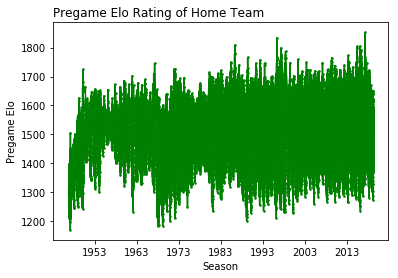

In [102]:
plt.plot(nba_data.date, nba_rolling_elo1pre, color='green', marker='o', markersize=1.5, linestyle='solid');
plt.xlabel('Season')
plt.ylabel('Pregame Elo')
plt.title('Pregame Elo Rating of Home Team', loc='left');


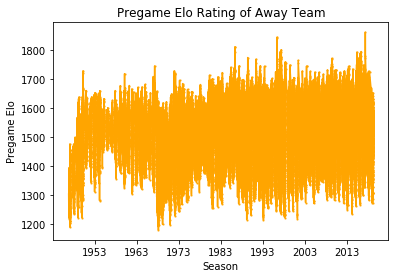

In [105]:
plt.plot(nba_data.date, nba_rolling_elo2pre, color='orange', marker='x', markersize=1.5, linestyle='solid');
plt.xlabel('Season')
plt.ylabel('Pregame Elo')
plt.title('Pregame Elo Rating of Away Team');

In [86]:
# Moving average of Away Team pre-game Elo rating
nba_rolling_elo2pre = nba_data.elo2_pre.rolling(window=2).mean()
nba_rolling_elo2pre

0                NaN
1        1303.361650
2        1303.361650
3        1300.000000
4        1300.000000
5        1296.638350
6        1306.828900
7        1315.016600
8        1307.171450
9        1291.318200
10       1297.014800
11       1306.577600
12       1284.266800
13       1272.370500
14       1305.511700
15       1313.456950
16       1288.791500
17       1311.512550
18       1324.931700
19       1316.283250
20       1296.295500
21       1291.249850
22       1313.927050
23       1295.258600
24       1291.664850
25       1304.099500
26       1305.695500
27       1297.097150
28       1276.461050
29       1298.233400
            ...     
68294    1413.170576
68295    1368.284447
68296    1433.717700
68297    1350.956526
68298    1392.122408
68299    1566.736748
68300    1580.265067
68301    1559.032428
68302    1590.392827
68303    1569.382319
68304    1496.750735
68305    1528.903947
68306    1471.877245
68307    1494.123106
68308    1652.690337
68309    1465.920071
68310    1428

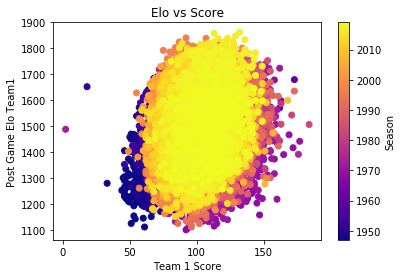

In [60]:
# make a scatterplot
#sns.lmplot(x='score1', y='elo1_post', c='season', cmap='plasma', data=nba_data);
plt.scatter(nba_data['score1'], nba_data['elo1_post'], c=nba_data['season'], cmap='plasma')
plt.xlabel('Team 1 Score')
plt.ylabel('Post Game Elo Team1')
plt.title('Elo vs Score')
plt.colorbar().set_label('Season')

In [0]:
plt.plot( 'x', 'y', data=df, linestyle='', marker='o', markersize=0.7)
plt.xlabel('Value of X')
plt.ylabel('Value of Y')
plt.title('Overplotting? Try to reduce the dot size', loc='left')

##2018 Season Only

In [32]:
# Work with 2017-2018 values first
nba_2018 = nba_data.iloc[65783:67094]
print(nba_2018.shape) # Shows 1311 total games

(1311, 24)


In [34]:
nba_2018.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo1_post,carm-elo2_post,carm-elo_prob1,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2
65783,2017-10-17,2018,0,NaN,GSW,HOU,1760.609663,1574.467471,0.838508,0.161492,...,1753.884111,1682.115889,0.747495,0.252505,NaN,NaN,NaN,NaN,121.0,122.0
65784,2017-10-18,2018,0,NaN,IND,BRK,1502.884837,1405.034022,0.757481,0.242519,...,1411.729285,1375.270715,0.671978,0.328022,NaN,NaN,NaN,NaN,140.0,131.0
65785,2017-10-18,2018,0,NaN,WAS,PHI,1565.684248,1379.575952,0.838481,0.161519,...,1552.479069,1474.520931,0.718121,0.281879,NaN,NaN,NaN,NaN,120.0,115.0
65786,2017-10-18,2018,0,NaN,ORL,MIA,1390.229357,1552.809706,0.410901,0.589099,...,1464.397752,1476.602248,0.598634,0.401366,NaN,NaN,NaN,NaN,116.0,109.0
65787,2017-10-18,2018,0,NaN,DET,CHO,1456.654984,1473.216401,0.617821,0.382179,...,1439.104231,1529.895769,0.476536,0.523464,NaN,NaN,NaN,NaN,102.0,90.0


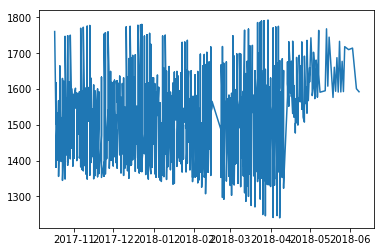

In [75]:
plt.plot('date', 'elo1_pre', data=nba_2018, markerfacecolor='blue')
plt.show()

In [0]:
plt.plot

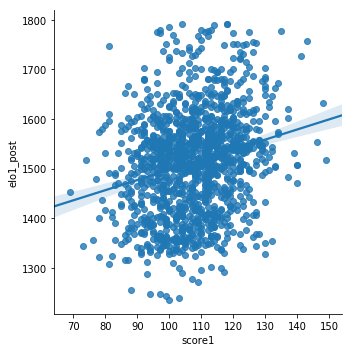

In [72]:
# make a scatterplot
sns.lmplot(x='score1', y='elo1_post', data=nba_2018);


In [0]:
#help(sns.lmplot)

In [0]:
nba_2018.plot.hist(x='score1');

In [22]:
nba_data.dtypes

date              datetime64[ns]
season                     int64
neutral                    int64
playoff                   object
team1                     object
team2                     object
elo1_pre                 float64
elo2_pre                 float64
elo_prob1                float64
elo_prob2                float64
elo1_post                float64
elo2_post                float64
carm-elo1_pre            float64
carm-elo2_pre            float64
carm-elo1_post           float64
carm-elo2_post           float64
carm-elo_prob1           float64
carm-elo_prob2           float64
carmelo1_pre             float64
carmelo2_pre             float64
carmelo_prob1            float64
carmelo_prob2            float64
score1                   float64
score2                   float64
dtype: object

In [10]:
nba_2018.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm-elo1_post,carm-elo2_post,carm-elo_prob1,carm-elo_prob2,carmelo1_pre,carmelo2_pre,carmelo_prob1,carmelo_prob2,score1,score2
20170,1978-12-02,1979,0,NaN,NYK,POR,1479.9301,1512.0514,0.596461,0.403539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,77.0
20171,1978-12-02,1979,0,NaN,PHI,SEA,1589.0641,1593.8909,0.633639,0.366361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,100.0
20172,1978-12-02,1979,0,NaN,PHO,GSW,1571.8826,1524.8765,0.699777,0.300223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,116.0
20173,1978-12-02,1979,0,NaN,SAS,DEN,1556.3341,1506.9819,0.702606,0.297394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,104.0
20174,1978-12-02,1979,0,NaN,SDC,DET,1394.5913,1438.7286,0.579707,0.420293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,120.0


####3. Explore Parse/Clean Data
  * Determine what data is necessary and which is auxiliary
  * Clean data - deal with empty cells/NaN
    * need isna().sum() to analyze where NaNs are located
   

In [0]:
nba_data.isna().sum()

In [0]:
# Create a function to add highest elo win yes(1) or no(0)
def f(row):
    if (row['score1'] > row['score2']) & (row['elo1_pre'] > row['elo2_pre']):
        val = 1
    elif (row['score2'] > row['score1']) & (row['elo2_pre'] > row['elo1_pre']):
        val = 1
    else:
        val = 0
    return val

In [0]:
# Create a function to check if home team won
def h(row):
    if (row['score1'] > row['score2']):
        val = 1
    else:
        val = 0
    return val

In [0]:
# Create a function to check if home and higher elo team won
def j(row):
    if (row['score1'] > row['score2']) & (row['elo1_pre'] > row['elo2_pre']):
        val = 1
    else:
        val = 0
    return val

In [0]:
nba_data['Elo_win'] = nba_data.apply(f, axis=1)

In [0]:
nba_data['home_win'] = nba_data.apply(h, axis=1)

In [0]:
nba_data['home_elo'] = nba_data.apply(j, axis=1)

In [117]:
print(nba_data.Elo_win.value_counts())
print(nba_data.home_win.value_counts())
print(nba_data.home_elo.value_counts())



1    43407
0    24917
Name: Elo_win, dtype: int64
1    41877
0    26447
Name: home_win, dtype: int64
0    42561
1    25763
Name: home_elo, dtype: int64


####4. Define essential data, Group data


In [0]:
nba_years = nba_data.groupby

####5. Data Viz

In [0]:
#see above


####6. Build further models/algorithms

####7. Feedback loop / Iterate